# What is t-test? <br/>
The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.

<img src="https://miro.medium.com/max/878/0*KCxLdtr1n035AJKX.png" >

Student’s T-tests can be used in real life to compare means. For example, a drug company may want to test a new cancer drug to find out if it improves life expectancy. In an experiment, there’s always a control group (a group who are given a placebo, or “sugar pill”). The control group may show an average life expectancy of +5 years, while the group taking the new drug might have a life expectancy of +6 years. It would seem that the drug might work. But it could be due to a fluke. To test this, researchers would use a Student’s t-test to find out if the results are repeatable for an entire population.

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/12/image046.png" , height=500, width=500>
<img src="https://i.pinimg.com/originals/3c/6c/77/3c6c773e32944faa40f373f7abcff365.png", height=300, width=300 >

**What is t-score**? <br/><br/>
The t score is a ratio between the difference between two groups and the difference within the groups. The larger the t score, the more difference there is between groups. The smaller the t score, the more similarity there is between groups. A t score of 3 means that the groups are three times as different from each other as they are within each other. When you run a t test, the bigger the t-value, the more likely it is that the results are repeatable. <br/><br/>
A large t-score tells you that the groups are different.<br/>
A small t-score tells you that the groups are similar.

**What are T-Values and P-values?** <br/><br/>
How big is “big enough”? Every t-value has a p-value to go with it. A p-value is the probability that the results from your sample data occurred by chance. P-values are from 0% to 100%. They are usually written as a decimal. For example, a p value of 5% is 0.05. Low p-values are good; They indicate your data did not occur by chance. For example, a p-value of .01 means there is only a 1% probability that the results from an experiment happened by chance. In most cases, a p-value of 0.05 (5%) is accepted to mean the data is valid.

**Types of t-tests?** <br/><br/>
There are three main types of t-test:<br/>
1. An **Independent Samples t-test** compares the means for two groups.<br/>
2. A **Paired sample t-test** compares means from the same group at different times (say, one year apart).<br/>
3. A **One sample t-test** tests the mean of a single group against a known mean.

## How to perform a 2 sample t-test?

**Determine a null and alternate hypothesis.** <br/>
In general, the null hypothesis will state that the two populations being tested have no statistically significant difference. The alternate hypothesis will state that there is one present.

**Collect sample data** <br/>
Next step is to collect data for each population group. The sample size should ideally be the same but it can be different. Lets say that the sample sizes are nx and ny.

**Determine a confidence interval and degrees of freedom** <br/>
This is what we call alpha (α). The typical value of α is 0.05. This means that there is 95% confidence that the conclusion of this test will be valid. The degree of freedom can be calculated by the the following formula:<br/>
<img src="https://miro.medium.com/max/396/1*qRJLlOvVG_56qsDqrdLkyQ.png" >

**Calculate the t-statistic** <br/>
t-statistic can be calculated using the below formula: <br/>
<img src="https://miro.medium.com/max/932/1*1ZUnA4eR5J2WEGhDVPDkEw.png" >

where, Mx and My are the mean values of the two samples.<br/>
nx and ny are the sample space of the two samples <br/>
S is the standard deviation

**Calculate the critical t-value from the t distribution**. <br/>
To calculate the critical t-value, we need 2 things, the chosen value of alpha and the degrees of freedom. The formula of critical t-value is complex but it is fixed for a fixed pair of degree of freedom and value of alpha. We therefore use a table to calculate the critical t-value: <br/>
<img src="https://miro.medium.com/max/1646/1*0_EW4xt4le_SIrmO7z9FPA.png", height=500, width=500 >

In python, rather than looking up in the table we will use a function from the sciPy package.

**Compare the critical t-values with the calculated t statistic**<br/>
If the calculated t-statistic is greater than the critical t-value, the test concludes that there is a statistically significant difference between the two populations. Therefore, you reject the null hypothesis that there is no statistically significant difference between the two populations.

In [1]:
## Import the packages
import numpy as np
from scipy import stats

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html

In [2]:
## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html

In [13]:
# Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)


In [14]:
## Calculate the t-statistics
t = (a.mean() - b.mean())/(np.sqrt(var_a/N + var_b/N))
print(t)

3.8413354565813096


<img src="https://miro.medium.com/max/932/1*1ZUnA4eR5J2WEGhDVPDkEw.png", height=300, width=300 >

In [30]:
## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html

In [35]:
#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)

In [36]:
print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) 
# a p-value of .001 means there is only a 0.1% probability that the results from an experiment happened by chance
# and thus we reject the null hypothesis and 
# thus it proves that the mean of the two distributions are different and statistically significant.


t = 3.8413354565813096
p = 0.0011959855990781865


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [19]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 3.8413354565813096
p = 0.001195985599078187


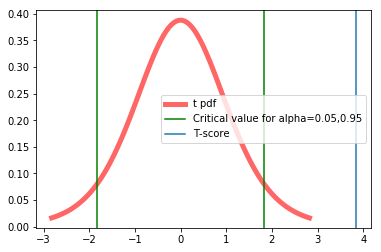

In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
df = 9
x = np.linspace(stats.t.ppf(0.01,df= df),stats.t.ppf(0.99, df=df), 100)
ax.plot(x, stats.t.pdf(x, df= df),'r-', lw=5, alpha=0.6, label='t pdf')
plt.axvline(x=stats.t.ppf(0.95,df=df), label='Critical value for alpha=0.05,0.95', color='g')
plt.axvline(x=stats.t.ppf(0.05,df=df), color='g')
plt.axvline(x=t2, label='T-score')
plt.legend()

In [72]:
stats.t.ppf(0.975, df=9,loc=0,scale=1)

2.2621571627409915

In [74]:
stats.norm.ppf(0.975,loc=0,scale=1)

1.959963984540054

In [76]:
n = 10
n_mean = 30
sum_n = n * n_mean
sum_n

300

In [78]:
 300 - np.array([2,-43,34,56,23,55,77,33,55]).sum()

8

# Example

A study was done to see the effect of presence of dogs as pets on kids (ages 10 to 18). Two groups of teenagers, one group with teenagers who owned a dog for minimum 5 years and another group of kids who never owned a dog, were presented a questionnaire and scores were computed. High score corresponds to higher cheerfulness and low score corresponds to lower cheerfulness. <br/>
Do dogs have a significant effect (either positive or negative) on the cheerfulness of kids? <br/><br/>

Dog: 6.6, 7.8, 4.6, 7.8, 7, 8, 9, 9, 8.8, 9.9, 8.5, 7.7, 8.6, 8, 7, 5.8, 7.4 <br/>
No_dog: 9.8, 8.3, 7.1, 7.2, 8.1, 8.9, 6, 7, 7.5, 7.8, 7.6, 7.3, 6.4, 6.8, 7, 6.4, 7.9 <br/><br/><br/>


What are the null and alternative hypothesis?<br/>
Is it a right tailed or a left tailed test?<br/>
Is it a one sample or a two sample test?<br/>
Is it a test of mean, proportion or variance?<br/>
Which statistical test do you think is appropriate?


Let's perform a two sample t-test to check if there is a significant difference in means of the two samples


In [42]:
dog = np.array([6.6, 7.8, 4.6, 7.8, 7, 8, 9, 9, 8.8, 9.9, 8.5, 7.7, 8.6, 8, 7, 5.8, 7.4])
no_dog = np.array([9.8, 8.3, 7.1, 7.2, 8.1, 8.9, 6, 7, 7.5, 7.8, 7.6, 7.3, 6.4, 6.8, 7, 6.4, 7.9])

In [46]:
dog_mean = dog.mean()
no_dog_mean = no_dog.mean()
print('Dog mean : {} , No Dog mean : {}'.format(dog_mean,no_dog_mean))
dog_var = dog.var(ddof=1)
no_dog_var = no_dog.var(ddof=1)
print('Dog var : {} , No Dog var : {}'.format(dog_var,no_dog_var))
dog_std = dog.std(ddof=1)
no_dog_std = no_dog.std(ddof=1)
print('Dog std : {} , No Dog std : {}'.format(dog_std,no_dog_std))

Dog mean : 7.735294117647059 , No Dog mean : 7.476470588235294
Dog var : 1.6599264705882357 , No Dog var : 0.9031617647058826
Dog std : 1.28838133741072 , No Dog std : 0.9503482333891523


In [40]:
t3, p3 = stats.ttest_ind(dog,no_dog)
print("t = " + str(t3))
print("p = " + str(p3))

t = 0.6665710337435845
p = 0.5098239300755949


In [63]:
stats.norm.ppf(0.975, loc=0, scale=1)

1.959963984540054

In [60]:
np.linspace(stats.t.ppf(0.01,df= df),stats.t.ppf(0.99, df=df), 100)

array([-2.55237963, -2.50081641, -2.44925318, -2.39768996, -2.34612673,
       -2.29456351, -2.24300028, -2.19143706, -2.13987383, -2.08831061,
       -2.03674738, -1.98518416, -1.93362093, -1.88205771, -1.83049448,
       -1.77893126, -1.72736803, -1.67580481, -1.62424158, -1.57267836,
       -1.52111513, -1.46955191, -1.41798868, -1.36642546, -1.31486223,
       -1.26329901, -1.21173578, -1.16017256, -1.10860933, -1.05704611,
       -1.00548288, -0.95391966, -0.90235643, -0.85079321, -0.79922999,
       -0.74766676, -0.69610354, -0.64454031, -0.59297709, -0.54141386,
       -0.48985064, -0.43828741, -0.38672419, -0.33516096, -0.28359774,
       -0.23203451, -0.18047129, -0.12890806, -0.07734484, -0.02578161,
        0.02578161,  0.07734484,  0.12890806,  0.18047129,  0.23203451,
        0.28359774,  0.33516096,  0.38672419,  0.43828741,  0.48985064,
        0.54141386,  0.59297709,  0.64454031,  0.69610354,  0.74766676,
        0.79922999,  0.85079321,  0.90235643,  0.95391966,  1.00

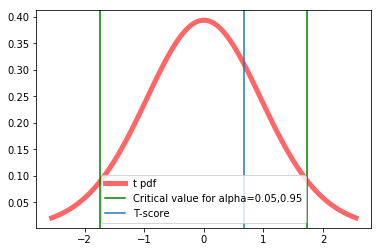

In [59]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
x = np.linspace(stats.t.ppf(0.01,df= df),stats.t.ppf(0.99, df=df), 100)
ax.plot(x, stats.t.pdf(x, df= df),'r-', lw=5, alpha=0.6, label='t pdf')
plt.axvline(x=stats.t.ppf(0.95,df=df), label='Critical value for alpha=0.05,0.95', color='g')
plt.axvline(x=stats.t.ppf(0.05,df=df), color='g')
plt.axvline(x=t3, label='T-score')
plt.legend()

In [64]:
0.025 + 0.95 + 0.025

1.0

In [65]:
0.025 + 0.95

0.975

In [66]:
stats.norm.ppf(0.025, loc=0, scale=1)

-1.9599639845400545

In [67]:
stats.norm.ppf(0.975, loc=0, scale=1)

1.959963984540054


It is well inside the critical level. We could not prove that pets either increase or decrease the cheerfulness of kids.We fail to reject the null hypothesis



In [51]:
import statsmodels.api as sm
sm.stats.ztest(dog, no_dog,alternative='two-sided')

(0.6665710337435845, 0.5050461765345835)

<img src="https://miro.medium.com/max/758/1*CFK2wlmBSHgXCo74Od6Z6g.png" >

<img src="https://miro.medium.com/max/1724/1*VXxdieFiYCgR6v7nUaq01g.jpeg" >

In [55]:
sm.stats.ztest(dog, no_dog,alternative='larger')

(0.6665710337435845, 0.25252308826729175)

In [56]:
sm.stats.ztest(dog, no_dog,alternative='smaller')

(0.6665710337435845, 0.7474769117327082)